# Just trying to get the most promising zipcodes

## 1 - Exploratory Data Analysis

Data in the file `zillow_data.csv`.

In [2]:
# Import necessary librairies
import pandas as pd
import numpy as np
import folium
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [3]:
# Load csv and display header
zillow_df = pd.read_csv('zillow_data.csv')
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


**Notes** : it looks like the time series of the median estimated home value are contained per row per State/Metro/City/County

In [4]:
# Check datatypes
zillow_df.dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
               ...   
2015-11         int64
2015-12         int64
2016-01         int64
2016-02         int64
2016-03         int64
2016-04         int64
2016-05         int64
2016-06         int64
2016-07         int64
2016-08         int64
2016-09         int64
2016-10         int64
2016-11         int64
2016-12         int64
2017-01   

In [5]:
# Get some description and stats
zillow_df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [6]:
# Missing values
zillow_df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
              ... 
2015-11          0
2015-12          0
2016-01          0
2016-02          0
2016-03          0
2016-04          0
2016-05          0
2016-06          0
2016-07          0
2016-08          0
2016-09          0
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08     

**Notes** : Dataset missing values from April 1996 to June 2014

## 2 - Build nationwide mean price TS

Get an idea of whats going on nationwide

In [7]:
# Get mean per year of entire zillow dataset
nation_ts = zillow_df.mean()[3:]

In [8]:
# Convert it to a time serie
nation_ts.index = pd.to_datetime(nation_ts.index, format='%Y-%m')
nation_ts.index.freq = 'MS'
nation_ts.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq='MS')

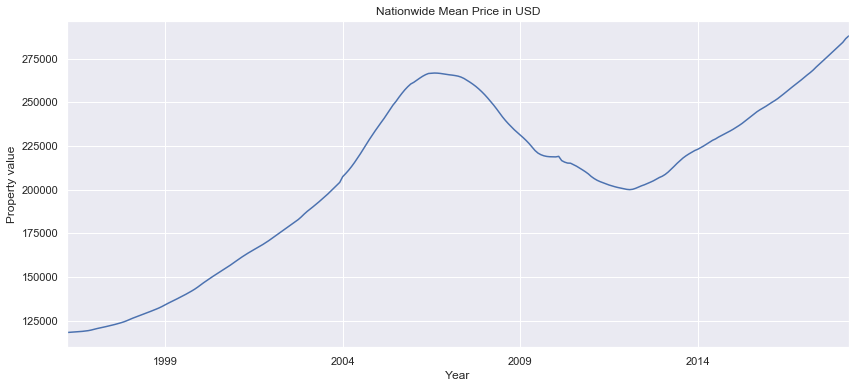

In [9]:
# PLot nation wide price evolution
nation_ts.plot(figsize=(14,6))
plt.title('Nationwide Mean Price in USD')
plt.xlabel('Year')
plt.ylabel('Property value')
plt.show();

**Notes** : This plot and the mean property price highly depends on external params not related to actual dataset like Global Economy growth, US GDP ... Interestingly, 

## 3 - Build TimeSeries per Zipcode

In [10]:
# Change RegionName / Zipcode type
zipcode_ts = zillow_df.copy()
zipcode_ts.RegionName = zipcode_ts.RegionName.astype('str')
zipcode_ts = zipcode_ts.set_index('RegionName')
zipcode_ts = zipcode_ts.iloc[:,6:]  # get rid of the descriptive columns
zipcode_ts = zipcode_ts.T
zipcode_ts.head()

RegionName,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,...,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
1996-04,334200.0,235700.0,210400.0,498100.0,77300.0,95000.0,152900.0,216500.0,95400.0,766000.0,...,80800.0,135900.0,78300.0,136200.0,62500.0,94600.0,92700.0,57100.0,191100.0,176400.0
1996-05,335400.0,236900.0,212200.0,500900.0,77300.0,95200.0,152700.0,216700.0,95600.0,771100.0,...,80100.0,136300.0,78300.0,136600.0,62600.0,94300.0,92500.0,57300.0,192400.0,176300.0
1996-06,336500.0,236700.0,212200.0,503100.0,77300.0,95400.0,152600.0,216900.0,95800.0,776500.0,...,79400.0,136600.0,78200.0,136800.0,62700.0,94000.0,92400.0,57500.0,193700.0,176100.0
1996-07,337600.0,235400.0,210700.0,504600.0,77300.0,95700.0,152400.0,217000.0,96100.0,781900.0,...,78600.0,136900.0,78200.0,136800.0,62700.0,93700.0,92200.0,57700.0,195000.0,176000.0
1996-08,338500.0,233300.0,208300.0,505500.0,77400.0,95900.0,152300.0,217100.0,96400.0,787300.0,...,77900.0,137100.0,78100.0,136700.0,62700.0,93400.0,92100.0,58000.0,196300.0,175900.0


In [11]:
# Make it a Time Serie
zipcode_ts.index = pd.to_datetime(zipcode_ts.index, format='%Y-%m')
zipcode_ts.index.freq = 'MS'
zipcode_ts.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq='MS')

In [12]:
# Deal with NaN values
zipcode_ts.isna().sum()

RegionName
60657      0
75070      0
77494      0
60614      0
79936      0
77084      0
10467      0
60640      0
77449      0
94109      0
11226      0
32162      0
11375      0
11235      0
37013      0
90250      0
60647      0
37211      0
78660      0
60618      0
10011    105
10128      0
77573      0
77584      0
28269      0
79912      0
78572      0
94565      0
30349      0
20002      0
        ... 
12156      0
97149      0
77457      0
80481      0
20625      0
20618      0
80510      0
49710      0
1270       0
12480      0
83821    117
29915      0
49768    111
3215     171
28039    219
97733    213
92322      0
3812       0
89413      0
92341      0
3765       0
84781      0
12429      0
97028      0
12720      0
1338       0
3293       0
40404      0
81225      0
89155      0
Length: 14723, dtype: int64

In [13]:
# Missing values are largely due to valuation starting at a spoecific point in time. In order to deal with NaN without
# loosing data from other zipcode, we are filling the NaN with the first known valuation.
zipcode_ts = zipcode_ts.bfill()

## 4 - Find best Zipcode with most growth

### Growth Rate

In order to plot and look at best zipcode, we need first to build time series that represent the growth rate per zipcode :

$$growthrate_{t} = \frac{price_{t} - price_{t-period}}{price_{t}}$$

Here we are looking at positive growth rate ;-)

![growth](https://media.giphy.com/media/26n6PxXCcE7d1O7Go/source.gif "Growth")

### Sharpe Ratio

The Sharpe Ratio mesures the diff between a financial asset versus a secure financial placement (in other words the risk of a placement) divided by the standard deviation of the growth rate placement (or volatility).

$$ S=\frac{R-r}{\sigma} $$

where $R$ is the growth rate of the placement, $r$ is the growth rate of secure placement $\sigma$ is the standard deviation of the growth rate placement

To simplify, the Sharpe Ratio gives a indication of the growth rate compared to normal rate taking into account the risk

- If ratio is negative then not a good placement
- If ratio between 0 and 1 then the placement growth is due to a bigger taken risk
- If ratio superior to 1, the placement is performaing above average is not that much risk


In [14]:
# Define a function that returns a growth rate dataframe over a defined period
def build_period_growth_ts(ts, periods=12):
    # Get diff in property value during period
    period_raw_growth_ts = ts.diff(periods=periods).dropna()

    # Shift TimeSeries
    shifted_period_ts = ts.shift(periods=periods).dropna()

    # Generate growth rate at zipcode and nation level
    period_growth_rate_ts = period_raw_growth_ts / shifted_period_ts
    
    return period_growth_rate_ts

def build_period_sharpe_ratio_ts(ts, referential_ts, periods=12):
    period_growth_ts = build_period_growth_ts(ts, periods)
    referential_growth_ts = build_period_growth_ts(referential_ts, periods)
    std_growth_ts = period_growth_ts.std()
    numerator = (np.array(period_growth_ts).T - np.array(referential_growth_ts)).T
    denominator = np.array(std_growth_ts)  # Not sure about takin the STD of the entire dataset
    
    return pd.DataFrame(numerator/denominator, columns=period_growth_ts.columns, index=period_growth_ts.index)

# Get growth rate TS per zipcode & nationwide (or referential)
zipcode_yr_growth_rate_ts = build_period_growth_ts(zipcode_ts, 12)
nation_yr_growth_rate_ts = build_period_growth_ts(nation_ts, 12)

sharpe_ratio_ts = build_period_sharpe_ratio_ts(zipcode_ts, nation_ts, 12)
sharpe_ratio_ts.head()

RegionName,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,...,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
1997-04-01,0.212759,-2.478391,-1.187881,-0.354273,-0.319279,-0.554051,-0.391411,0.055933,-0.295316,0.814779,...,-1.351457,0.056375,-0.247589,-0.228448,-0.258236,-0.716556,-0.600674,0.635483,0.868818,-0.158151
1997-05-01,0.180269,-2.820724,-1.292213,-0.507350,-0.357601,-0.654033,-0.394875,0.082630,-0.350145,0.853017,...,-1.344812,0.038690,-0.269648,-0.299137,-0.295291,-0.650526,-0.624361,0.679876,0.887598,-0.165773
1997-06-01,0.158907,-3.037973,-1.257360,-0.630225,-0.397447,-0.731708,-0.399354,0.118694,-0.406379,0.893963,...,-1.352025,0.020231,-0.292583,-0.365324,-0.333157,-0.568011,-0.648590,0.777964,0.916037,-0.170051
1997-07-01,0.144605,-3.141614,-1.105381,-0.717916,-0.438490,-0.810816,-0.396553,0.164554,-0.446471,0.938121,...,-1.347382,0.000962,-0.316208,-0.437188,-0.371748,-0.468531,-0.662781,0.846253,0.948567,-0.178749
1997-08-01,0.149785,-3.133416,-0.858642,-0.770863,-0.502955,-0.867373,-0.410754,0.220056,-0.470414,0.980760,...,-1.341574,-0.010701,-0.315224,-0.514745,-0.410979,-0.369236,-0.688397,0.882622,0.990656,-0.187896


### Get top 25 performers and worth 25 performars

To do so, we sum the total growth rate over a specific period of time (e.g. since beginning of 2017) and look at the last row that aggregates the total growth rate over time.

In [15]:
# Get the top 25 performers overall since 2017
since_date = '2017'
top_25_perforners_zipcodes = zipcode_yr_growth_rate_ts[since_date:].cumsum()[-1:].T.sort_values(by='2018-04-01 00:00:00', ascending=False).iloc[0:25].index
top_25_perforners_zipcodes

Index(['27980', '29405', '32640', '29601', '66104', '56081', '32117', '33805',
       '56120', '33855', '33563', '75241', '56062', '78264', '66102', '7088',
       '38118', '33801', '32180', '66103', '40208', '29661', '32211', '33069',
       '75224'],
      dtype='object', name='RegionName')

In [16]:
less_25_perforners_zipcodes = zipcode_yr_growth_rate_ts[since_date:].cumsum()[-1:].T.sort_values(by='2018-04-01 00:00:00', ascending=False).iloc[-25:-1].index

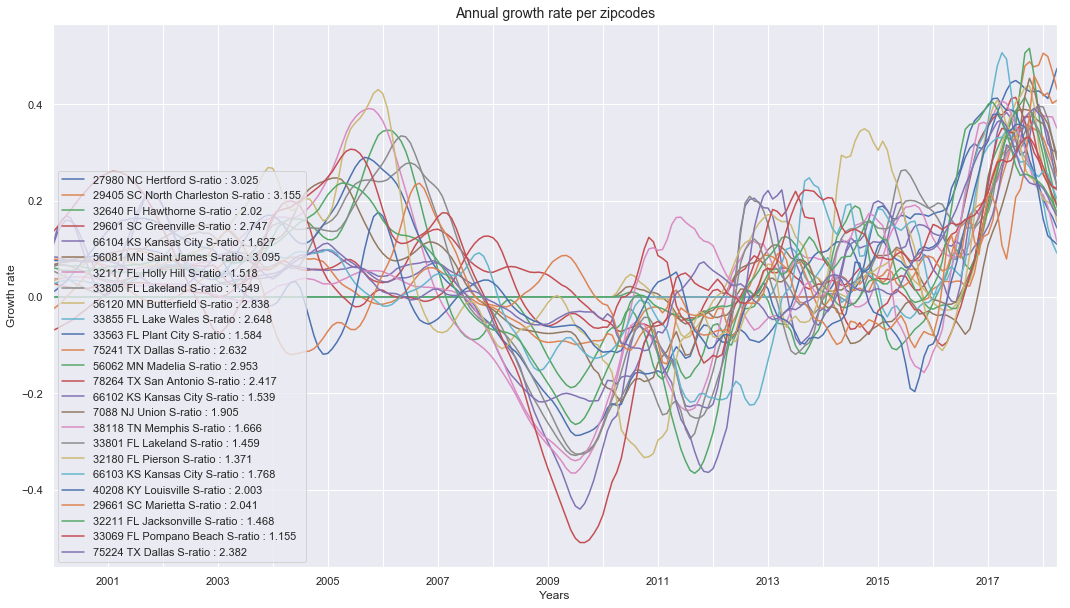

In [17]:
# define a plot function that display growth rate for specific zipcodes
def plot_zipcodes(zipcodes, since_date, start='2000', end=None):
    plt.figure(figsize=(18,10))
    for zipcode in zipcodes:
        zipcode_info = zillow_df[zillow_df['RegionName'] == int(zipcode)]
        sharpe_ratio_mean = round(sharpe_ratio_ts[since_date:][zipcode].mean(), 3)
        label = '{} {} {} S-ratio : {}'.format(zipcode_info.RegionName.values[0], zipcode_info.State.values[0], zipcode_info.City.values[0], sharpe_ratio_mean)
        zipcode_yr_growth_rate_ts[zipcode][start:end].plot(label=label)

    plt.legend(loc='lower left')
    plt.grid(True, which='minor')
    plt.xlabel('Years')
    plt.ylabel('Growth rate')
    plt.title('Annual growth rate per zipcodes', fontsize=14)
    plt.show()

plot_zipcodes(top_25_perforners_zipcodes, since_date)

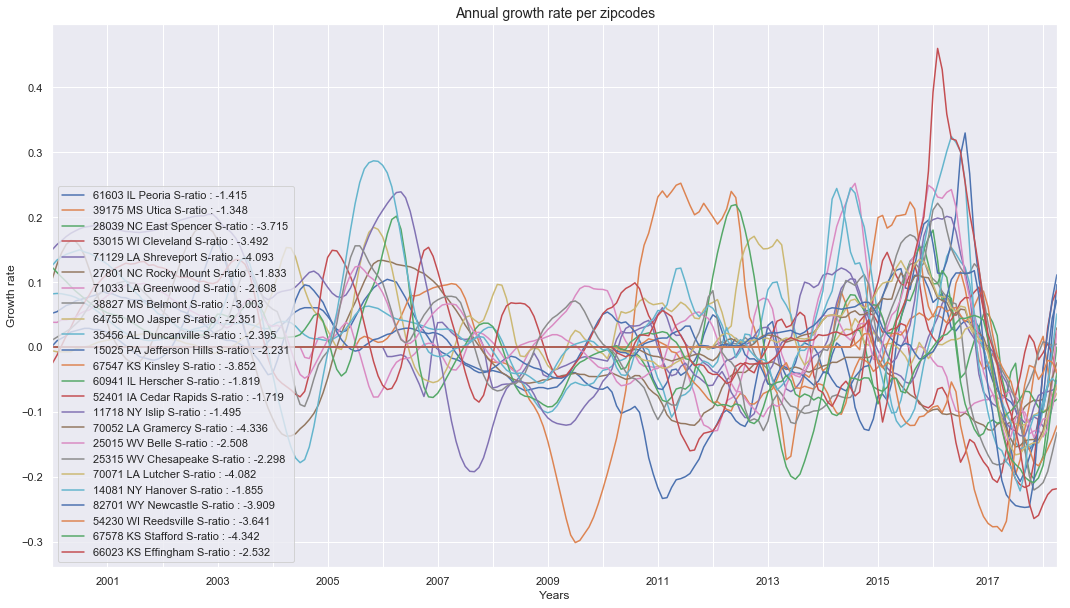

In [18]:
 plot_zipcodes(less_25_perforners_zipcodes, since_date)

### Looking at correlation between the top 10

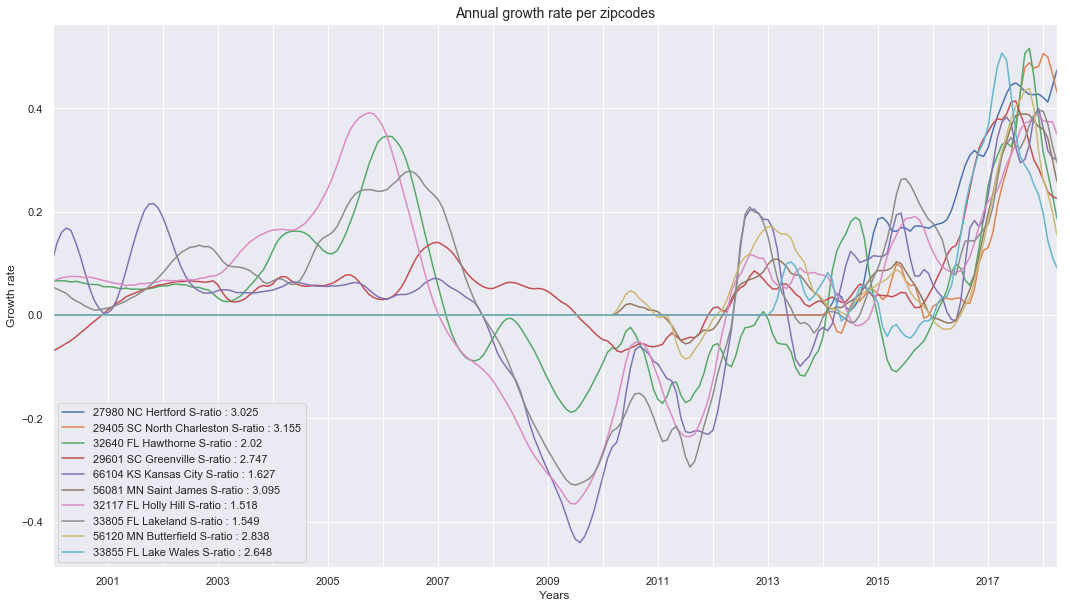

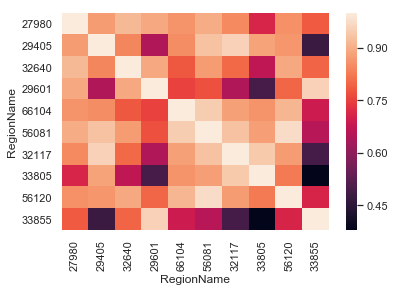

In [19]:
top_10_perforners_zipcodes = zipcode_yr_growth_rate_ts[since_date:].cumsum()[-1:].T.sort_values(by='2018-04-01 00:00:00', ascending=False).iloc[0:10].index
plot_zipcodes(top_10_perforners_zipcodes, since_date)
sns.heatmap(zipcode_yr_growth_rate_ts['2015':][top_10_perforners_zipcodes].corr());

## Plotting on a Map

The zipcode geo-encoded csv file can be found [here](https://simplemaps.com/data/us-zips)

In [20]:
zipcodes_df = pd.read_csv('uszips.csv')
zipcodes_df.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,601,18.1800,-66.7522,Adjuntas,PR,Puerto Rico,True,NaN,18570,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",False,False,America/Puerto_Rico
1,602,18.3607,-67.1752,Aguada,PR,Puerto Rico,True,NaN,41520,523.7,72003,Aguada,{'72003':100},False,False,America/Puerto_Rico
2,603,18.4544,-67.1220,Aguadilla,PR,Puerto Rico,True,NaN,54689,667.9,72005,Aguadilla,{'72005':100},False,False,America/Puerto_Rico
3,606,18.1672,-66.9383,Maricao,PR,Puerto Rico,True,NaN,6615,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",False,False,America/Puerto_Rico
4,610,18.2903,-67.1224,Anasco,PR,Puerto Rico,True,NaN,29016,311.9,72011,Añasco,"{'72003':0.55,'72011':99.45}",False,False,America/Puerto_Rico


In [21]:
zipcodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33099 entries, 0 to 33098
Data columns (total 16 columns):
zip                   33099 non-null int64
lat                   33099 non-null float64
lng                   33099 non-null float64
city                  33099 non-null object
state_id              33099 non-null object
state_name            33099 non-null object
zcta                  33099 non-null bool
parent_zcta           0 non-null float64
population            33099 non-null int64
density               33099 non-null float64
county_fips           33099 non-null int64
county_name           33099 non-null object
all_county_weights    33099 non-null object
imprecise             33099 non-null bool
military              33099 non-null bool
timezone              33099 non-null object
dtypes: bool(3), float64(4), int64(3), object(6)
memory usage: 3.4+ MB


In [59]:
# test loading info for a specifi zipcode
zipc = zipcodes_df[zipcodes_df['zip']==int('33855')]
zipc

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
10995,33855,27.7954,-81.3528,Indian Lake Estates,FL,Florida,True,NaN,43,25.1,12105,Polk,{'12105':100},False,False,America/New_York


In [60]:
zipcodes_df.describe()

,zip,lat,lng,parent_zcta,population,density,county_fips
count,33099.000000,33099.000000,33099.000000,0.0,33099.000000,33099.000000,33099.000000
mean,49661.185081,38.835282,-91.013435,NaN,9439.790598,490.337191,29976.290402
std,27564.888409,5.357697,15.126676,NaN,13756.398726,1926.658179,15467.425998
min,601.000000,17.966100,-176.631600,NaN,0.000000,0.000000,1001.000000
25%,26630.000000,35.397250,-97.242100,NaN,736.500000,8.200000,18061.000000
50%,49736.000000,39.499100,-88.198300,NaN,2809.000000,31.400000,30023.000000
75%,72122.500000,42.120950,-80.227550,NaN,12954.500000,257.250000,42055.000000
max,99929.000000,71.273700,-65.290200,NaN,113916.000000,66553.400000,72153.000000


In [73]:
# Let's plot them on a Map

# Centered map on USA
m = folium.Map(
    location=[37.09024, -95.712891],
    tiles='Stamen Toner',
    zoom_start=5)

def build_marker(zipcode, color='green'):
    # Geo info
    lat = zipcodes_df[zipcodes_df['zip']==int(zipcode)]['lat']
    lon = zipcodes_df[zipcodes_df['zip']==int(zipcode)]['lng']
    zipcode_latlon = [lat,lon]
    
    # zipcode info
    state = zipcodes_df[zipcodes_df['zip']==int(zipcode)]['state_id'].values[0]
    city = zipcodes_df[zipcodes_df['zip']==int(zipcode)]['city'].values[0]
    population = zipcodes_df[zipcodes_df['zip']==int(zipcode)]['population'].values[0]
    label = '{} {} ({}) \n  pop:{}'.format(zipcode, city, state, str(population))

    return folium.CircleMarker(
        location=zipcode_latlon,
        radius=10,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        opacity=.5
    )

# Plot top 25 and worth 25 zipcodes
for zipcode in top_25_perforners_zipcodes:
    marker = build_marker(zipcode)
    marker.add_to(m)

for zipcode in less_25_perforners_zipcodes:
    marker = build_marker(zipcode, 'red')
    marker.add_to(m)

m